# Step1: Import the necessary libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats


The following dataset is a medical dataset about patient data. In addition, some data is missing, which would allow imputation (as suggested). It is very likely that the dataset originally came from the electronic health record (EHR) controlled by GSK Company and used for the healthcare hackathon. An EHR is a digital version of a patient's paper record. I assume that the dataset was not artificially created and that the data was gathered correctly.The covaccination trial dataset holds significant value in examining the effectiveness and safety of combined vaccinations, contributing to advancements in preventive healthcare practices.

# Step 2: Load the dataset

In [18]:
data = pd.read_csv("merged_data.csv")
data.head(n=10)

,volunteer_id,first_name,last_name,gender,age,vaccination_type,contact_number,location,timestamp,oxygen_saturation,pulse_rate,cold,cough,fever,diabetes,bp,zone,prescription_titles,prescription_steps,sleep_duration
0,1,Drew,Lynch,Male,65,Covishield,001-072-625-0486x83791,Andhra Pradesh,2023-05-31 00:00:00,86.0,NaN,0,0,0,207,125,Red,"['Oxygen Saturation', 'Diabetes', 'Blood Press...",{'Oxygen Saturation': 'Seek immediate medical ...,6
1,2,Linda,Brown,Male,48,Covishield,117-126-9460x240,Tamil Nadu,2023-05-31 00:00:00,98.0,118.0,1,0,1,186,122,Amber,"['Pulse Rate', 'Cold', 'Fever', 'Diabetes', 'B...",{'Pulse Rate': 'Seek immediate medical attenti...,8
2,3,Patricia,Mendoza,Female,59,Covaxin,+1-832-279-9381x719,Delhi,2023-05-31 00:00:00,97.0,133.0,0,1,1,278,123,Red,"['Pulse Rate', 'Cough', 'Fever', 'Diabetes', '...",{'Pulse Rate': 'Seek immediate medical attenti...,5
3,4,Alicia,Cole,Male,59,Covishield,4691395608,Andhra Pradesh,2023-05-31 00:00:00,100.0,78.0,1,1,0,294,144,Green,"['Cold', 'Cough', 'Diabetes', 'Blood Pressure']","{'Cold': 'Rest, drink fluids, and take over-th...",5
4,5,William,Scott,Male,33,Covaxin,101-976-2658x2991,Tamil Nadu,2023-05-31 00:00:00,NaN,99.0,0,1,0,88,144,Green,"['Cough', 'Blood Pressure']","{'Cough': 'Stay hydrated, use cough drops or c...",6
5,6,Ronald,Ramos,Female,34,Covishield,7520192497,Andhra Pradesh,2023-05-31 00:00:00,88.0,127.0,0,0,1,259,127,Red,"['Oxygen Saturation', 'Pulse Rate', 'Fever', '...",{'Oxygen Saturation': 'Seek immediate medical ...,8
6,7,Michelle,Ryan,Female,44,Covaxin,001-530-126-0856,Maharashtra,2023-05-31 00:00:00,86.0,82.0,1,1,0,173,138,Red,"['Oxygen Saturation', 'Cold', 'Cough', 'Diabet...",{'Oxygen Saturation': 'Seek immediate medical ...,5
7,8,Teresa,Lewis,Male,46,Covaxin,897-247-7633x03062,Maharashtra,2023-05-31 00:00:00,95.0,121.0,0,1,0,130,124,Red,"['Pulse Rate', 'Cough', 'Diabetes', 'Blood Pre...",{'Pulse Rate': 'Seek immediate medical attenti...,7
8,9,Erica,Steele,Male,51,Covishield,602-859-7952x3092,Karnataka,2023-05-31 00:00:00,93.0,134.0,1,1,0,240,128,Red,"['Oxygen Saturation', 'Pulse Rate', 'Cold', 'C...",{'Oxygen Saturation': 'Monitor oxygen saturati...,4
9,10,Donald,Webb,Male,39,Covaxin,083.053.8706,Delhi,2023-05-31 00:00:00,89.0,NaN,0,0,0,125,139,Red,"['Oxygen Saturation', 'Diabetes', 'Blood Press...",{'Oxygen Saturation': 'Seek immediate medical ...,6



# Step 3: Missing value handing

In [7]:
numeric_columns = data.select_dtypes(include=np.number)
# Calculate the number of missing values before imputation
missing_values_before = np.isnan(numeric_columns).sum().sum()

# Perform mean imputation
numeric_columns_mean_imputed = np.nanmean(numeric_columns, axis=0)

# Calculate the number of missing values after mean imputation
missing_values_after_mean = np.isnan(numeric_columns_mean_imputed).sum().sum()

# Perform median imputation
numeric_columns_median_imputed = np.nanmedian(numeric_columns, axis=0)

# Calculate the number of missing values after median imputation
missing_values_after_median = np.isnan(numeric_columns_median_imputed).sum().sum()

# Perform mode imputation
mode_values = stats.mode(numeric_columns, axis=0, nan_policy='omit').mode
numeric_columns_mode_imputed = np.where(np.isnan(numeric_columns), mode_values, numeric_columns)

# Calculate the number of missing values after mode imputation
missing_values_after_mode = np.isnan(numeric_columns_mode_imputed).sum().sum()

# Perform zero imputation
numeric_columns_zero_imputed = np.nan_to_num(numeric_columns, nan=0)

# Calculate the number of missing values after zero imputation
missing_values_after_zero = np.isnan(numeric_columns_zero_imputed).sum().sum()

# Print the results
print("Missing values before imputation:", missing_values_before)
print("Missing values after mean imputation:", missing_values_after_mean)
print("Missing values after median imputation:", missing_values_after_median)
print("Missing values after mode imputation:", missing_values_after_mode)
print("Missing values after zero imputation:", missing_values_after_zero)


Missing values before imputation: 985
Missing values after mean imputation: 0
Missing values after median imputation: 0
Missing values after mode imputation: 0
Missing values after zero imputation: 0


C:\Users\rrpat\AppData\Local\Temp\ipykernel_19700\2302800564.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_values = stats.mode(numeric_columns, axis=0, nan_policy='omit').mode


In [16]:
import pandas as pd

# Convert the imputed arrays to a DataFrame
mean_imputed_df = pd.DataFrame(numeric_columns_mean_imputed.reshape(-1, len(numeric_columns.columns)), columns=numeric_columns.columns)
median_imputed_df = pd.DataFrame(numeric_columns_median_imputed.reshape(-1, len(numeric_columns.columns)), columns=numeric_columns.columns)
mode_imputed_df = pd.DataFrame(numeric_columns_mode_imputed.reshape(-1, len(numeric_columns.columns)), columns=numeric_columns.columns)
zero_imputed_df = pd.DataFrame(numeric_columns_zero_imputed.reshape(-1, len(numeric_columns.columns)), columns=numeric_columns.columns)

# Print the imputed values
print("Mean imputed values:")
print(mean_imputed_df)

print("\nMedian imputed values:")
print(median_imputed_df)

print("\nMode imputed values:")
print(mode_imputed_df)

print("\nZero imputed values:")
print(zero_imputed_df)


Mean imputed values:
   volunteer_id      age  oxygen_saturation  pulse_rate  cold   cough   fever   
0        2500.5  41.4526          92.583426  105.088378   0.5  0.4966  0.4958  \

   diabetes        bp  sleep_duration  
0  189.6318  135.1286          6.9828  

Median imputed values:
   volunteer_id   age  oxygen_saturation  pulse_rate  cold  cough  fever   
0        2500.5  42.0               93.0       105.0   0.5    0.0    0.0  \

   diabetes     bp  sleep_duration  
0     188.0  135.0             7.0  

Mode imputed values:
      volunteer_id   age  oxygen_saturation  pulse_rate  cold  cough  fever   
0              1.0  65.0               86.0       134.0   0.0    0.0    0.0  \
1              2.0  48.0               98.0       118.0   1.0    0.0    1.0   
2              3.0  59.0               97.0       133.0   0.0    1.0    1.0   
3              4.0  59.0              100.0        78.0   1.0    1.0    0.0   
4              5.0  33.0               97.0        99.0   0.0    1.0

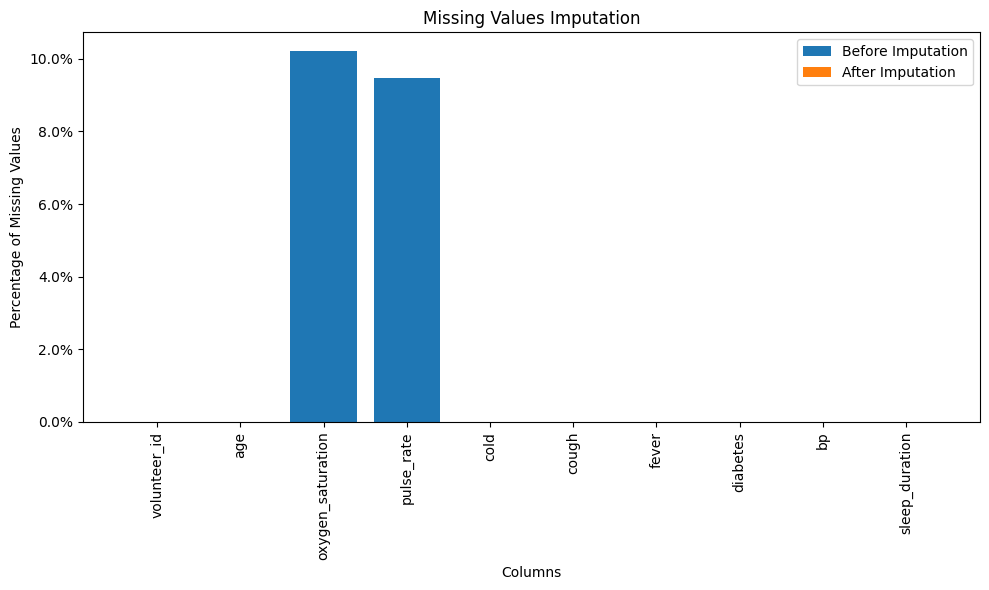

In [8]:

# Handle missing values using data imputation techniques
# Select numeric columns for mean calculation
numeric_columns = data.select_dtypes(include=np.number)

# Calculate the percentage of missing values before imputation
missing_values_before = numeric_columns.isnull().sum() / len(numeric_columns) * 100

# Perform mean imputation
numeric_columns_imputed = numeric_columns.fillna(numeric_columns.mean())

# Calculate the percentage of missing values after imputation
missing_values_after = numeric_columns_imputed.isnull().sum() / len(numeric_columns_imputed) * 100

# Create a bar plot to visualize the missing values
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(numeric_columns.columns, missing_values_before, label='Before Imputation')
ax.bar(numeric_columns.columns, missing_values_after, label='After Imputation')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Missing Values Imputation')
ax.legend()
plt.xticks(rotation=90)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Assuming you have loaded your data into a variable called 'data'

# Select numeric columns for mean calculation
numeric_columns = data.select_dtypes(include=np.number)

# Calculate the percentage of missing values before imputation
missing_values_before = numeric_columns.isnull().sum() / len(numeric_columns) * 100

# Perform mean imputation
numeric_columns_mean_imputed = numeric_columns.fillna(numeric_columns.mean())

# Perform median imputation
numeric_columns_median_imputed = numeric_columns.fillna(numeric_columns.median())

# Perform mode imputation
numeric_columns_mode_imputed = numeric_columns.fillna(numeric_columns.mode().iloc[0])

# Perform zero imputation
numeric_columns_zero_imputed = numeric_columns.fillna(0)

# Calculate the percentage of missing values after each imputation technique
missing_values_mean_imputed = numeric_columns_mean_imputed.isnull().sum() / len(numeric_columns_mean_imputed) * 100
missing_values_median_imputed = numeric_columns_median_imputed.isnull().sum() / len(numeric_columns_median_imputed) * 100
missing_values_mode_imputed = numeric_columns_mode_imputed.isnull().sum() / len(numeric_columns_mode_imputed) * 100
missing_values_zero_imputed = numeric_columns_zero_imputed.isnull().sum() / len(numeric_columns_zero_imputed) * 100

# Create a bar plot to visualize the missing values
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(numeric_columns.columns))

ax.bar(index, missing_values_before, width=bar_width, label='Before Imputation')
ax.bar(index + bar_width, missing_values_mean_imputed, width=bar_width, label='Mean Imputation')
ax.bar(index + 2 * bar_width, missing_values_median_imputed, width=bar_width, label='Median Imputation')
ax.bar(index + 3 * bar_width, missing_values_mode_imputed, width=bar_width, label='Mode Imputation')
ax.bar(index + 4 * bar_width, missing_values_zero_imputed, width=bar_width, label='Zero Imputation')

ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Missing Values Imputation')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(numeric_columns.columns, rotation=90)
ax.legend()

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

plt.tight_layout()
plt.show()


# Step 5: Split the Data for Zone Prediction

In [ ]:
X_zone = data[['oxygen_saturation', 'pulse_rate']]
y_zone = data['zone']
X_zone_train, X_zone_test, y_zone_train, y_zone_test = train_test_split(X_zone, y_zone, test_size=0.4, random_state=42)

# Step 6: Train the Random Forest Classifier for Zone Prediction

In [ ]:
rf_classifier_zone = RandomForestClassifier()
rf_classifier_zone.fit(X_zone_train, y_zone_train)

# Step 7: Make Predictions for Zone

In [ ]:
y_zone_pred = rf_classifier_zone.predict(X_zone_test)

# Step 8: Evaluate the Model for Zone

In [ ]:
report_zone = classification_report(y_zone_test, y_zone_pred)
print(report_zone)


# Step 9: Display the predicted zone along with the additional parameters for comparison

In [ ]:
comparison_df = X_zone_test.copy()
comparison_df['predicted_zone'] = y_zone_pred
print(comparison_df)

# Step 11: Split the Data for Prescription Prediction

In [ ]:
X_prescription = data[['oxygen_saturation', 'pulse_rate', 'cold', 'cough', 'fever', 'diabetes', 'bp']]
y_prescription = data[['prescription_titles', 'prescription_steps']]
X_prescription_train, X_prescription_test, y_prescription_train, y_prescription_test = train_test_split(X_prescription,
                                                                                                        y_prescription,
                                                                                                        test_size=0.2,
                                                                                                        random_state=42)


# Step 12: Train the Random Forest Classifier for Prescription Prediction

In [ ]:
rf_classifier_prescription = RandomForestClassifier()
rf_classifier_prescription.fit(X_prescription_train, y_prescription_train)

# Step 13: For binary targets

In [ ]:
# Generate Predictions for Prescription
y_prescription_pred = rf_classifier_prescription.predict(X_prescription_test)

In [ ]:
y_prescription_test_np = y_prescription_test['prescription_titles'].to_numpy()

report_binary = classification_report(y_prescription_test_np, y_prescription_pred[:, 0])


In [ ]:
print("Binary Targets Report:")
print(report_binary)

# Step 14: For multiclass targets

In [ ]:
y_prescription_test_np = y_prescription_test['prescription_titles'].to_numpy().reshape(-1, 1)
report_multiclass = classification_report(y_prescription_test_np, y_prescription_pred[:, 1:], zero_division=1)
print("Multiclass Targets Report:")
print(report_multiclass)


# Step 15: Display the predicted prescription along with the additional parameters for comparison

In [ ]:
comparison_df_prescription = X_prescription_test.copy()

comparison_df_prescription['predicted_prescription_binary'] = y_prescription_pred[:, 0].reshape(-1)

comparison_df_prescription['predicted_prescription_multiclass'] = y_prescription_pred[:, 1:].reshape(-1)

print(comparison_df_prescription)

# Step 16: number of volunteers in each zone

In [ ]:
import matplotlib.pyplot as plt

# Count the number of volunteer IDs in each zone
zone_counts = data['zone'].value_counts()

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the zone counts
ax.bar(zone_counts.index, zone_counts.values)

# Set the labels and title
ax.set_xlabel('Zone')
ax.set_ylabel('Number of Volunteer IDs')
ax.set_title('Number of Volunteer IDs in Each Zone')

# Display the plot
plt.show()

# Step 17: Create age groups based on the age column

In [ ]:
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '61+'])

# Group the data by age group and zone, and count the number of volunteers in each group
age_zone_counts = data.groupby(['age_group', 'zone']).size().unstack()

# Create a bar plot with subplots for each zone
fig, axes = plt.subplots(nrows=1, ncols=len(age_zone_counts.columns), figsize=(12, 6))

# Iterate over the zones and create a bar plot for each
for i, (zone, ax) in enumerate(zip(age_zone_counts.columns, axes)):
    # Plot the number of volunteers in each age group for the current zone
    ax.bar(age_zone_counts.index, age_zone_counts[zone])
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Number of Volunteers')
    ax.set_title(f'Number of Volunteers in Zone: {zone}')

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()

# Step 18 :Separate the data for male and female volunteers in each zone

In [ ]:
male_data = data[data['gender'] == 'Male']
female_data = data[data['gender'] == 'Female']

# Group the data by zone and count the number of male and female volunteers in each group
male_zone_counts = male_data.groupby('zone').size()
female_zone_counts = female_data.groupby('zone').size()

# Create a bar plot for male volunteers
plt.figure(figsize=(8, 6))
plt.bar(male_zone_counts.index, male_zone_counts)
plt.xlabel('Zone')
plt.ylabel('Number of Male Volunteers')
plt.title('Number of Male Volunteers in Each Zone')
plt.show()

# Create a bar plot for female volunteers
plt.figure(figsize=(8, 6))
plt.bar(female_zone_counts.index, female_zone_counts)
plt.xlabel('Zone')
plt.ylabel('Number of Female Volunteers')
plt.title('Number of Female Volunteers in Each Zone')
plt.show()